# 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Downloads\olist_translated_fixed.csv")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,maua,SP,4.0,"I haven't tested the product yet, but it arriv...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,perfumery,belo horizonte,SP,4.0,Very good product.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,auto,guariba,SP,5.0,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,pet_shop,belo horizonte,MG,5.0,I was sad that you didn't answer me.,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,stationery,mogi das cruzes,SP,5.0,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [4]:
import numpy as np
from scipy.stats import kurtosis, skew
#Univariate SEDA

numerical_attributes = ['price', 'review_score']
categorical_attributes = ['product_category', 'customer_state']


for att in numerical_attributes:
        # min,max,range
        min_value = round(df[att].min(), 2)
        max_value = round(df[att].max(), 2)
        range_value = round(max_value - min_value, 2)

        # Five number summary
        Q1 = round(df[att].quantile(0.25), 2)
        median = round(df[att].median(), 2)
        Q3 = round(df[att].quantile(0.75), 2)

        # Mean
        mean_value = round(df[att].mean(), 2)

        # IQR
        IQR = round(Q3 - Q1, 2)

        # Variance and standard deviation
        variance = round(df[att].var(), 2)
        std_dev = round(df[att].std(), 2)
        # MAD
        mad = round((df[att] - df[att].mean()).abs().mean(), 2)

        n = pd.to_numeric(df[att],errors='coerce').dropna()
        k = kurtosis(n, bias=True, fisher=True)
        s = skew(n, bias=True)
        k = round(k,2)
        s = round(s,2)

        print(att, ": ", "min = ", min_value, ", max = ", max_value, ", range = ", range_value,", Q1 = ", Q1, ", median = ", median, ", Q3 = ", Q3,
        ", mean = ", mean_value, ", IQR = ", IQR,", variance = ", variance, ", std_dev = ", std_dev,", MAD = ", mad, ", Kurtosis = ",k,", Skew = ",s)

        #Identifying outliers using IQR fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        outliers = df[(df[att] < lower_fence) | (df[att] > upper_fence)][att]
        print("Potential Outliers =", len(outliers), "(Values outside [", round(lower_fence, 2), ",", round(upper_fence, 2), "])")

#Frequency tables for categorical attributes
for att in categorical_attributes:
     freq_table = pd.crosstab(df[att], 'count')
     print("Frequency table for ", att)
     print(freq_table)
     print("\n")

#Finding mode for categorical attributes
for att in categorical_attributes:
    m = df[att].mode()
    print("Mode for ",att,": ",m)
    print("\n")
#Observations: We can see that the price is highly right skewed and the freight value also they are very heavy tailed, so most of the products and
#shipping costs are cheap.
#It seems that there is a quit large number of outliers we should deal with in next steps. It seems that bed path table category has trendy
#products so the company should manage its inventory according to that. It seems that most of the customers live in SP state so the company should try
#to put more adds in other states to maximize their profit.

price :  min =  0.85 , max =  6735.0 , range =  6734.15 , Q1 =  39.9 , median =  74.9 , Q3 =  134.9 , mean =  120.48 , IQR =  95.0 , variance =  33591.44 , std_dev =  183.28 , MAD =  89.91 , Kurtosis =  121.1 , Skew =  7.93
Potential Outliers = 8449 (Values outside [ -102.6 , 277.4 ])
review_score :  min =  1.0 , max =  5.0 , range =  4.0 , Q1 =  4.0 , median =  5.0 , Q3 =  5.0 , mean =  4.02 , IQR =  1.0 , variance =  1.96 , std_dev =  1.4 , MAD =  1.11 , Kurtosis =  0.13 , Skew =  -1.25
Potential Outliers = 18711 (Values outside [ 2.5 , 6.5 ])
Frequency table for  product_category
col_0                       count
product_category                 
agro_industry_and_commerce    212
air_conditioning              297
art                           209
arts_and_craftmanship          24
audio                         365
...                           ...
stationery                   2525
tablets_printing_image         83
telephony                    4550
toys                         4125
wa

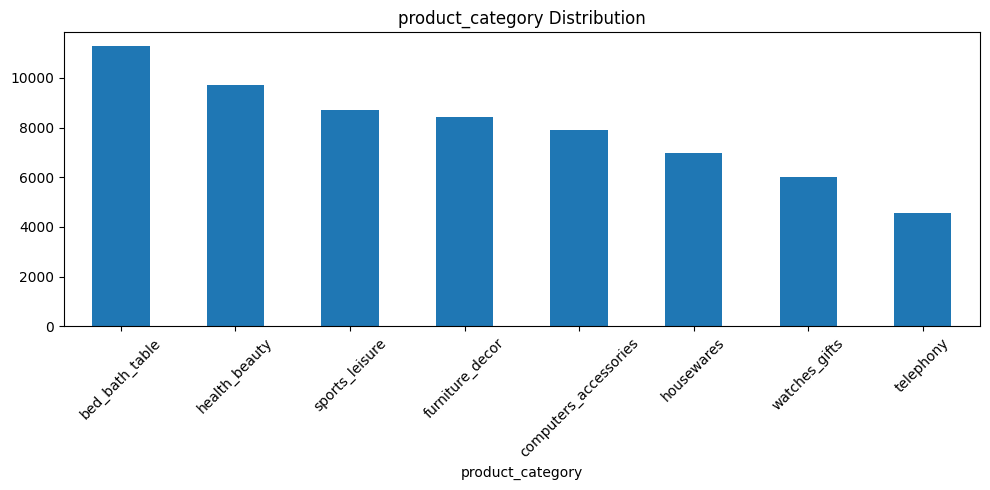

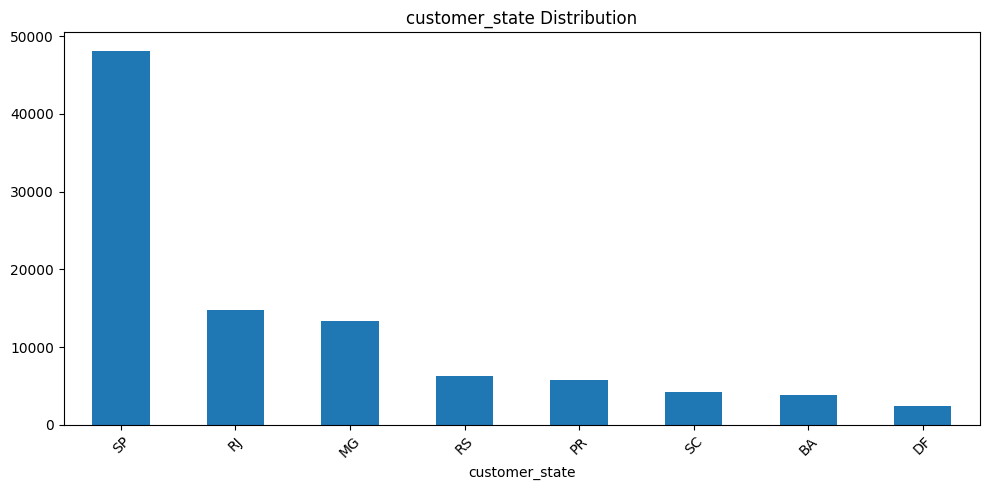

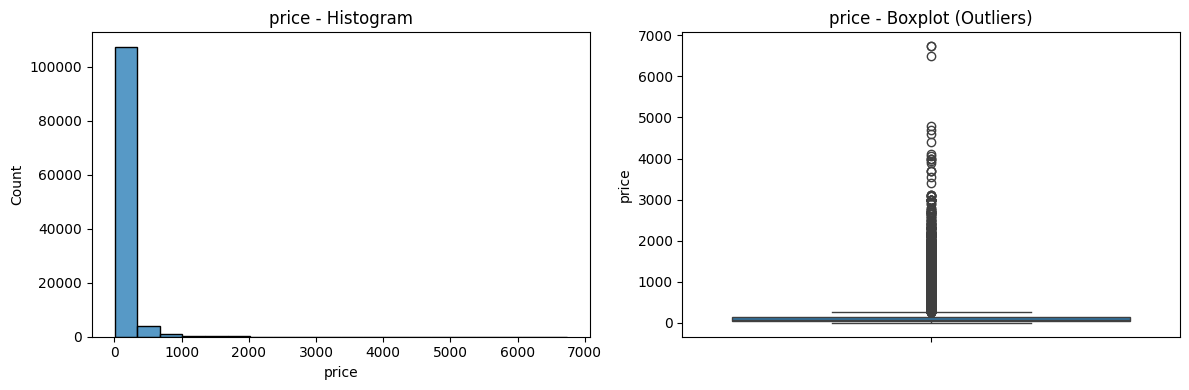

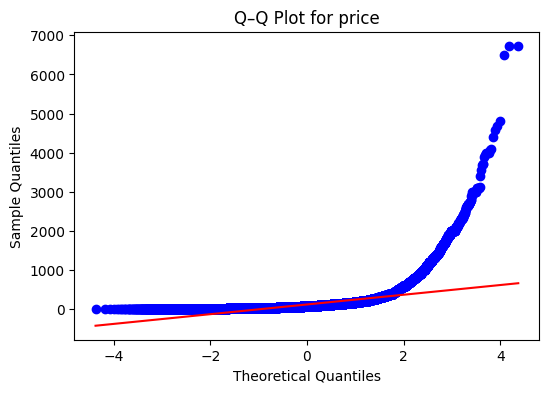

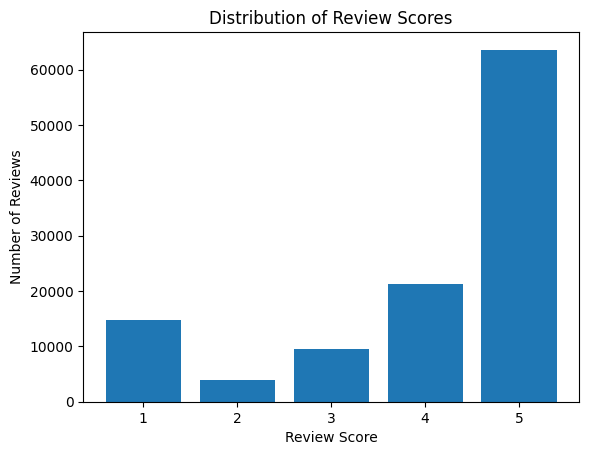

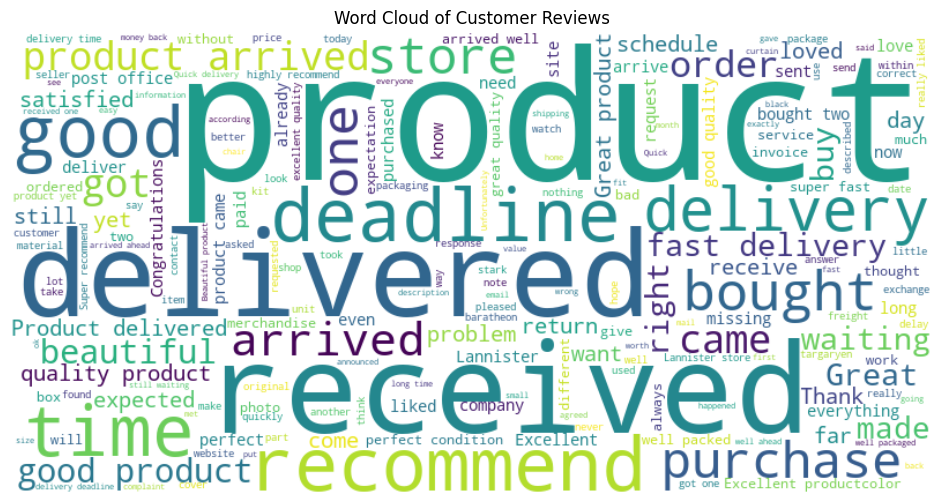

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import scipy.stats as stats
#Univariate GEDA

numerical_attributes = ['price']
categorical_attributes = ['product_category', 'customer_state']

#Bar charts for categorical attributes
for att in categorical_attributes:
    df[att].value_counts().head(8).plot.bar(figsize=(10, 5), title=f'{att} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
#Plots confirm our observation in the above cell but we see also that health beauty category can also have trendy products because it is almost close
#to bed bath table category.

for att in numerical_attributes:
    n = pd.to_numeric(df[att],errors='coerce').dropna()
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(n, bins=20, ax=axes[0]) #I have used 20 bins to show the clear distribution of the attributes and to see the skewness in a clear way 
                                         #as most of them are skewed.
    axes[0].set_title(f"{att} - Histogram")
    
    # Boxplot
    sns.boxplot(y=n, ax=axes[1])
    axes[1].set_title(f"{att} - Boxplot (Outliers)")
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    stats.probplot(n, dist="norm", plot=plt)
    plt.title(f"Q–Q Plot for {att}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.show()

#We can clearly see outliers in the numerical attributes.
#Q-Q plot was added to see the skewness clearly.

#Review score distribution
score_counts = df['review_score'].value_counts().sort_index()

plt.bar(score_counts.index, score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores")
plt.show()
#We can see that most of the customer are satisfied with their purchases, then the company already achieves good profit.

#Combine all review texts
text = " ".join(str(comment) for comment in df['review_comment_message'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Customer Reviews")
plt.show()

#Most of the reviews are good reviews and it is about order state.

In [8]:
print("Missing Value:")
missing_data = df.isnull().sum().sort_values(ascending=False)
# Display only columns with missing values
print(missing_data[missing_data > 0])
#A lot of missing values that need to be imputed.

Missing Value:
review_comment_message     65964
product_category            2414
product_photos_qty          2390
review_answer_timestamp      961
review_creation_date         961
review_score                 961
product_width_cm             796
product_height_cm            796
product_length_cm            796
product_weight_g             796
seller_state                 778
seller_city                  778
freight_value                778
price                        778
shipping_limit_date          778
seller_id                    778
product_id                   778
order_item_id                778
dtype: int64


In [10]:
#Convert the dates to a standard format.
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])

# 2. Preprocessing

In [13]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Handling missing values
#For dates remove empty raws
df = df.dropna(subset=['order_purchase_timestamp'])
df = df.dropna(subset=['review_creation_date'])

df = df.dropna(subset=['product_id'])

#For messages we filled them with no comment
df['review_comment_message'] = df['review_comment_message'].fillna('')

#For numerical variables impute them with median as it is more robust.
if df['price'].isnull().any():
    median = df['price'].median()
    df['price'] = df['price'].fillna(median)
    
if df['freight_value'].isnull().any():
    median = df['freight_value'].median()
    df['freight_value'] = df['freight_value'].fillna(median)
    
if df['review_score'].isnull().any():
    median = df['review_score'].median()
    df['review_score'] = df['review_score'].fillna(median)

#For categorical variables impute them with mode
mode = df['customer_state'].mode().iloc[0]
df['customer_state'] = df['customer_state'].fillna(mode)

mode = df['product_category'].mode().iloc[0]
df['product_category'] = df['product_category'].fillna(mode)
    
#Handling Outliers by using log transformation
df['price_log'] = np.log1p(df['price'])


df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp,price_log
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,maua,SP,4.0,"I haven't tested the product yet, but it arriv...",2017-10-11,2017-10-12 03:43:48,3.433665
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,perfumery,belo horizonte,SP,4.0,Very good product.,2018-08-08,2018-08-08 18:37:50,4.784989
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,auto,guariba,SP,5.0,,2018-08-18,2018-08-22 19:07:58,5.080783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,pet_shop,belo horizonte,MG,5.0,I was sad that you didn't answer me.,2017-12-03,2017-12-05 19:21:58,3.828641
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,stationery,mogi das cruzes,SP,5.0,,2018-02-17,2018-02-18 13:02:51,3.039749


# 3. Feature Engineering

In [16]:
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from concurrent.futures import ThreadPoolExecutor
from sklearn.linear_model import LinearRegression
#Initialize the main DataFrame X, which will hold the final features.
X = df[['customer_id', 'product_id', 'order_id', 'order_purchase_timestamp', 'review_creation_date', 'customer_state', 'review_score', 'price_log', 'product_category']].copy()

#Set the current time reference (Max order time in the dataset)
current_time = df['order_purchase_timestamp'].max()

#Derived Features

#Customer Behavioral Features (F_C) 

#Recency which represents time since the customer orders a product
recency_df = X.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
recency_df['recency'] = (current_time - recency_df['order_purchase_timestamp']).dt.days
recency_df = recency_df[['customer_id', 'recency']]

#Frequency which represents the total orders for each customer
frequency_df = df.groupby('customer_id')['order_id'].nunique().reset_index(name='frequency')

#Monetary which represents the average spending by a customer
df['total_spending'] = df['price'] + df['freight_value']
total_per_order = df.groupby(['customer_id','order_id'])['total_spending'].sum().reset_index(name='total_order')
monetary_df = total_per_order.groupby('customer_id')['total_order'].mean().reset_index(name='monetary')

#avg_review_score which reprsents the satisfaction of the customers for products they bought on average
customer_review = X.groupby('customer_id')['review_score'].mean().reset_index(name='avg_review_score')

#prefered_category which represents the prefered category for each customer
#Count the number of orders each customer made in each category
category_counts = X.groupby(['customer_id', 'product_category'])['order_id'].nunique().reset_index(name='category_count')
#Find the category that has the max order count for each customer
category_counts['max_count'] = category_counts.groupby('customer_id')['category_count'].transform('max')
#Filter raws with only max ordered categories for each customer
prefered = category_counts[category_counts['category_count'] == category_counts['max_count']]
#Take the first one in case of having two categories that have the same count
prefered_category_final = prefered.drop_duplicates(subset=['customer_id'], keep='first')
#Keep only needed columns
prefered_category_final = prefered_category_final[['customer_id', 'product_category']].rename(columns={'product_category': 'prefered_category'})

frequency_df['frequency_log'] = np.log1p(frequency_df['frequency'])
monetary_df['monetary_log'] = np.log1p(monetary_df['monetary'])
#Merge customer features together
F_C_agg = recency_df.merge(frequency_df, on='customer_id', how='left')
F_C_agg = F_C_agg.merge(monetary_df, on='customer_id', how='left')
F_C_agg = F_C_agg.merge(customer_review, on='customer_id', how='left')
F_C_agg = F_C_agg.merge(prefered_category_final, on='customer_id', how='left')
#Also merge the customer state as it's a customer attribute
F_C_agg = F_C_agg.merge(X[['customer_id', 'customer_state']].drop_duplicates(), on='customer_id', how='left')
#Drop duplicates raws
F_C_agg = F_C_agg.drop_duplicates(subset=['customer_id'])


#Product Descriptive Features (F_P)
#historical_sales_count which represensts the company sales from each product
product_sales_count = X.groupby('product_id')['order_id'].count().reset_index(name='historical_sales_count')
product_sales_count['historical_sales_count_log'] = np.log1p(product_sales_count['historical_sales_count'])

#product_price_level 
#Split the data (80% train, 20% test) to do frequency-bining encoding
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
#The variable we want to discretize
disc_var = ['price_log']
#Create the equal-frequency binning transformer (easier for understanding customer behaviour)
#q=3 which represents Budget, Mid, Premium
disc = EqualFrequencyDiscretiser(q=3, variables=disc_var)
#Fit on training data to avoid data leakage
disc.fit(X_train)
#Transform the entire matrix X
#We transform into a temporary column to avoid overwriting price_log
X_temp = disc.transform(X.copy())
X['product_price_level_bin'] = X_temp['price_log']
#Map bin numbers to labels
label_map = { 0: 'Budget', 1: 'Mid_Range', 2: 'Premium'}
X['product_price_level'] = X['product_price_level_bin'].map(label_map)

#Aggregate this back to the product level by taking the mode to avoid having same products that have different prices as there maybe sales on products 
#at a period of time
product_price_level = X.groupby('product_id')['product_price_level'].agg(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan).reset_index(name='product_price_level')
#Now merge the new feature to the final product description data frame
F_P_agg = product_sales_count.merge(product_price_level, on='product_id', how='left')
#Drop duplicates raws
F_P_agg = F_P_agg.drop_duplicates(subset=['product_id'])



#Aggregate monthly sales per product
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')
product_monthly_sales = df.groupby(['product_id', 'year_month'])['order_id'].count().reset_index(name='monthly_sales')

#Map months to numerical values for regression
month_numbers = {month: i for i, month in enumerate(sorted(df['year_month'].unique()))}
product_monthly_sales['month_num'] = product_monthly_sales['year_month'].map(month_numbers)

#Using the linear regression model to do the prediction of the trend score
def compute_trend(product_id):
    #Filter the raws to keep only the information for the selected product id
    group = product_monthly_sales[product_monthly_sales['product_id'] == product_id]
    #If less than 2 month of sales data can't compute the slope
    if len(group) < 2: 
        return product_id, 0
    X_month = group['month_num'].values.reshape(-1, 1) #Independant variable
    y_sales = group['monthly_sales'].values  #Dependant variable
    
    lr = LinearRegression().fit(X_month, y_sales) #Train the model
    slope = lr.coef_[0] #Get the slope
    max_sales = y_sales.max()
    trend_score = slope / max_sales if max_sales > 0 else 0 #Normalizes the slope by dividing it by the maximum sales for that product.
    return product_id, trend_score #Retuen a tuple for the data frame later
    

#Compute scores in parallel as it is really slow 
products = product_monthly_sales['product_id'].unique()
trend_scores = {}
max_workers = 10
with ThreadPoolExecutor(max_workers=max_workers) as executor:
    results = executor.map(compute_trend, products)
    trend_scores = dict(results)


#Convert trend_scores to a data frame
trend_df = pd.DataFrame(list(trend_scores.items()), columns=['product_id', 'trend_score'])

#Merge the trends data frame to product features
F_P_agg  = F_P_agg.merge(trend_df, on='product_id', how='left')

#Merge all features together
X_final = (X[['customer_id', 'product_id']].drop_duplicates().merge(F_C_agg, on='customer_id', how='left').merge(F_P_agg, on='product_id', how='left'))

In [18]:
#Showing a subset of the final matrix
X_final.head(5)

,customer_id,product_id,recency,frequency,frequency_log,monetary,monetary_log,avg_review_score,prefered_category,customer_state,historical_sales_count,historical_sales_count_log,product_price_level,trend_score
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,335,1,0.693147,38.71,3.681603,4.0,housewares,SP,4,1.609438,Budget,0.000000
1,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,40,1,0.693147,141.46,4.959061,4.0,perfumery,BA,106,4.672829,Premium,0.058500
2,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,26,1,0.693147,179.12,5.193623,5.0,auto,GO,3,1.386294,Premium,0.000000
3,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,288,1,0.693147,72.20,4.293195,5.0,pet_shop,RN,4,1.609438,Budget,0.000000
4,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,201,1,0.693147,28.62,3.388450,5.0,stationery,SP,40,3.713572,Budget,0.052652


# 4. Scaling and Encoding

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_att = ['frequency_log','monetary_log','avg_review_score','historical_sales_count_log','trend_score','recency']
cat_att = ['prefered_category','customer_state','product_price_level']

#Numerical scaler
scaler = StandardScaler()
#Fit and transform numeric values
X_num_scaled = scaler.fit_transform(X_final[num_att])
#Convert the matrix to a data frame
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_att)

#Categorical encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')   
#Fit and transform categorical values
X_cat_encoded = encoder.fit_transform(X_final[cat_att])
#Get the column names
encoded_cat_cols = encoder.get_feature_names_out(cat_att)
#Convert the matrix to a data frame
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoded_cat_cols)

X_final_scaled = pd.concat([X_num_scaled_df, X_cat_encoded_df], axis=1)
X_final_scaled['customer_id'] = X_final['customer_id'].values


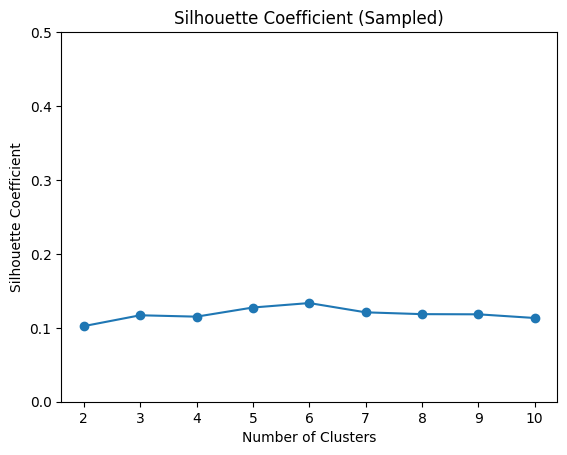

In [23]:
#Applying K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#Remove customer id
X_cluster = X_final_scaled.drop(columns=['customer_id'])

#Choose a subset of the data set because it is too slow when applied on the whole data set
sample_size = 5000 if len(X_cluster) > 5000 else len(X_cluster)
X_sample = X_cluster.sample(n=sample_size, random_state=42)

K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_sample)
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient (Sampled)')
plt.xlabel('Number of Clusters')
plt.ylim(0, 0.5) # Modify based on data
plt.ylabel('Silhouette Coefficient')
plt.xticks(K_range)
plt.show()

#It is giving that 6 is the best K as we are trying to maximize the silhouette score

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


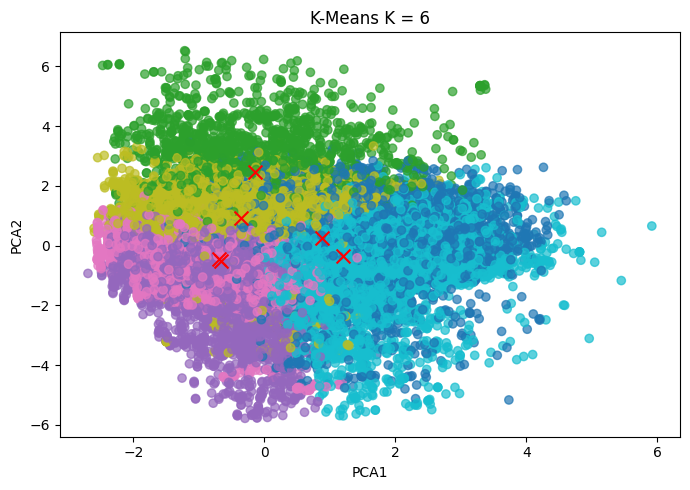

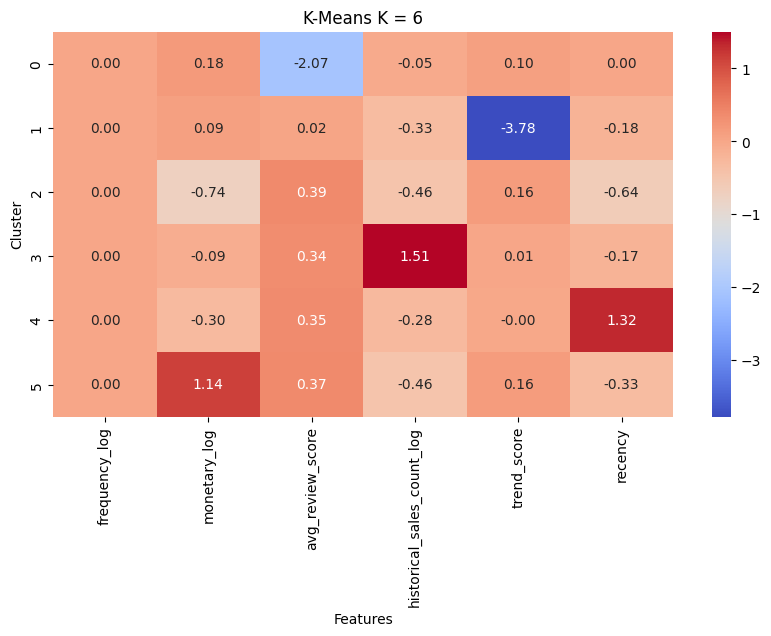

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

#K = 6
model = KMeans(n_clusters=6, random_state=42, n_init='auto')
cluster_labels = model.fit_predict(X_cluster)  #X_cluster = scaled features used in the above cell

#Reduce to 2D using PCA
pca = PCA(n_components=5, random_state=42)
X_2d = pca.fit_transform(X_cluster)  
#Transform cluster centers using PCA
centers = pca.transform(model.cluster_centers_)
#Plotting the result
plt.figure(figsize=(7,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=100, c='red')  #cluster centers
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means K = 6')
plt.tight_layout()


#Visualizing using Heatmaps
label_col = 'KMeans'
feature_cols = ['frequency_log','monetary_log','avg_review_score','historical_sales_count_log','trend_score','recency']
#Convert X_cluster into a data frame
clustered_data = pd.DataFrame(X_cluster, columns=feature_cols)


#Heatmap K = 6
model = KMeans(n_clusters=6, random_state=42, n_init='auto')
clustered_data['KMeans'] = model.fit_predict(X_cluster)
cluster_means = clustered_data.groupby('KMeans')[feature_cols].mean()
#Plotting the result
plt.figure(figsize=(10,5))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('K-Means K = 6')
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()



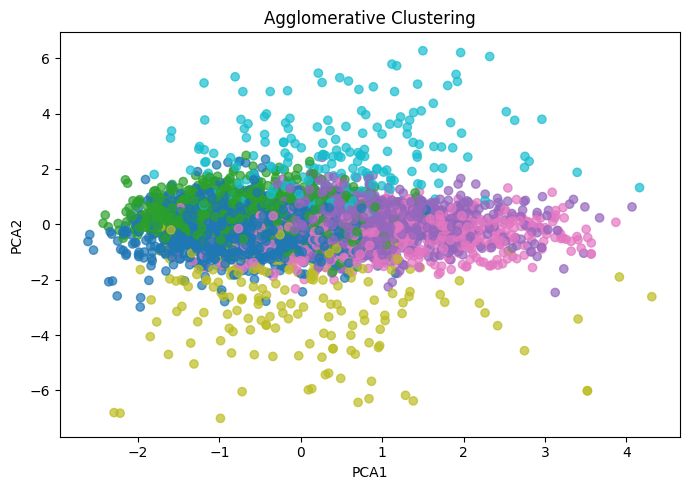

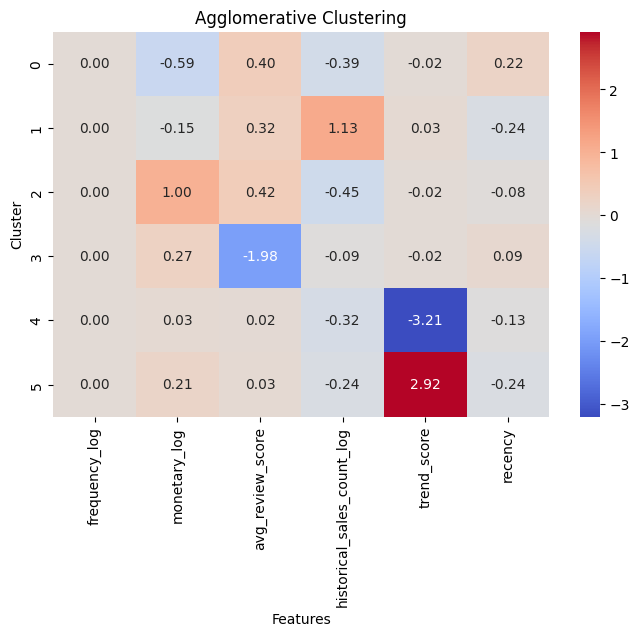

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Take a random subset (5000 customers) for faster computation
X_sampled = X_cluster.sample(n=5000, random_state=42)

#Apply Agglomerative Clustering
model = AgglomerativeClustering(6)  
cluster_labels = model.fit_predict(X_sampled)

#Reduce to 2D using PCA on the same subset
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_sampled)

#Plotting the result
plt.figure(figsize=(7,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Agglomerative Clustering')
plt.tight_layout()
plt.show()

clustered_data = X_sampled.copy()
clustered_data['Agglomerative'] = cluster_labels
#Visualizing using heatmap 
cluster_means = clustered_data.groupby('Agglomerative')[feature_cols].mean()
plt.figure(figsize=(8,5))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Agglomerative Clustering')
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()